In [2]:
import os
import matplotlib.image as img 
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [3]:
def process_data(folder): 
    gender = "";                                
    images = []; 
    dfs = pd.read_excel("./data/adultFaces/full_att_scores/demographics/demographic-others-labels.xlsx", sheet_name="Final Values")
    for subdir, dirs, files in os.walk(folder):
        for f in files:
            d = {};
            img = cv2.imread(os.path.join(subdir,f))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img/255.0, (256, 256))
                for n, emotion in zip(dfs["Filename"], dfs["Emotion?"]):
                    if(n == f):
                        if(emotion == 0):
                            d["emotion"] = "neutral"
                        elif(emotion == 1):
                            d["emotion"] = "happiness"
                        elif(emotion == 2):
                            d["emotion"] = "sadness"
                        elif(emotion == 3):
                            d["emotion"] = "anger"
                        elif(emotion == 4):
                            d["emotion"] = "fear"
                        elif(emotion == 5):
                            d["emotion"] = "surprise"
                        else:
                            d["emotion"] = "disgust"
                            
                        d["name"] = f
                        d["image"] = img
                        images.append(d)
    return images


path = "./data/adultFaces/faceImages"
img_info = process_data(path)

In [4]:
print(len(img_info))
# print(img_info[:20])

2222


In [5]:
counter = 0;
for i in img_info:
    if i["emotion"] == "fear":
        counter += 1
print(counter)

print(len(img_info)/2)
print(img_info[0]["image"].shape)

1
1111.0
(256, 256, 3)


In [6]:
labels = ["neutral", "happiness", "sadness", "anger", "fear", "surprise", "disgust"]
images = []
all_labels = []
for i in img_info:
    if(i["emotion"] == "fear"):
        img_info.remove(i)
for info in img_info:
    images.append(info["image"])
    all_labels.append(labels.index(info["emotion"]))

images = np.array(images)
all_labels = np.array(all_labels)
all_labels = all_labels.reshape(2221, 1)

In [7]:
print(images.shape)

(2221, 256, 256, 3)


In [8]:
image_smote = images.reshape(2221, 256*256*3)

In [9]:
sm = SMOTE(k_neighbors=1)
image_smote, label_smote = sm.fit_resample(image_smote, all_labels)

In [10]:
print(image_smote.shape)
label_smote = label_smote.reshape(9066, 1)

(9066, 196608)


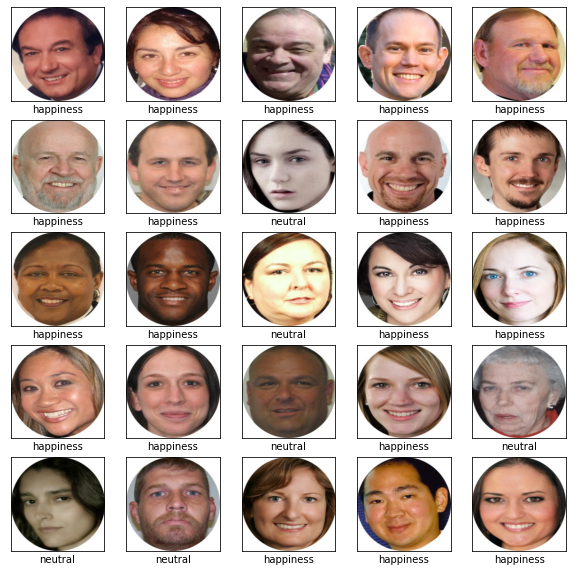

In [11]:
image2 = image_smote.reshape(9066, 256, 256, 3)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image2[i], cmap=plt.cm.binary)
    plt.xlabel(labels[label_smote[i][0]])
plt.show()

In [12]:
# images, all_labels = np.array(rand_males+females), np.array(rand_labels+female_labels)
train_images, test_images, train_labels, test_labels = train_test_split(image_smote, label_smote, train_size=0.5,test_size=0.5, stratify=label_smote)
# train_labels = train_labels.reshape(1111, 1)
# test_labels = train_labels.reshape(1111, 1)


In [13]:
from collections import Counter
count = []
# print(train_images.shape)
for t in train_labels:
    count.append(t[0])
print(Counter(count))
train_images = train_images.reshape(4533, 256, 256, 3)
train_labels = train_labels.reshape(4533, 1)
test_images = test_images.reshape(4533, 256, 256, 3)
test_labels = test_labels.reshape(4533, 1)

Counter({1: 756, 6: 756, 3: 756, 0: 755, 2: 755, 5: 755})


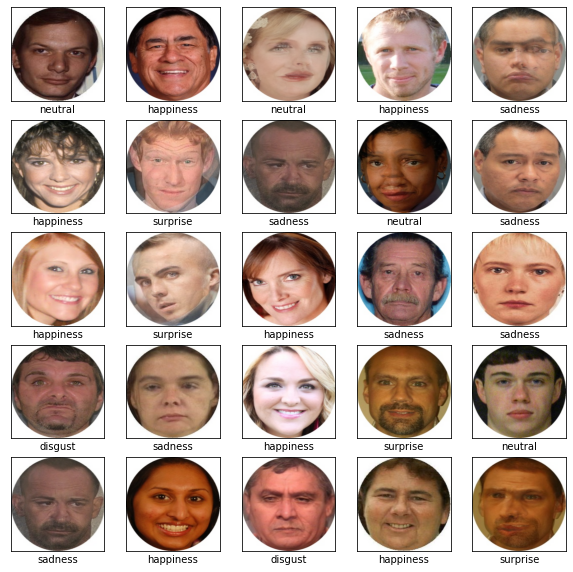

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(96, (11, 11), activation='relu', input_shape=(256, 256, 3), strides=(4, 4)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       8

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(7))

In [18]:
# model.get_layer("conv2d").output

# print(filters)

# for i in range(len(model.layers))

<tf.Tensor 'conv2d/Relu:0' shape=(None, 62, 62, 96) dtype=float32>

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
142/142 [==============================] - 275s 2s/step - loss: 1.8759 - accuracy: 0.1650 - val_loss: 1.7972 - val_accuracy: 0.1666
Epoch 2/10
142/142 [==============================] - 243s 2s/step - loss: 1.7996 - accuracy: 0.1617 - val_loss: 1.7973 - val_accuracy: 0.1666
Epoch 3/10
142/142 [==============================] - 221s 2s/step - loss: 1.7960 - accuracy: 0.1630 - val_loss: 1.7952 - val_accuracy: 0.1666
Epoch 4/10
142/142 [==============================] - 216s 2s/step - loss: 1.7957 - accuracy: 0.1721 - val_loss: 1.7956 - val_accuracy: 0.1668
Epoch 5/10
142/142 [==============================] - 227s 2s/step - loss: 1.7962 - accuracy: 0.1597 - val_loss: 1.7936 - val_accuracy: 0.1666
Epoch 6/10
142/142 [==============================] - 219s 2s/step - loss: 1.7950 - accuracy: 0.1608 - val_loss: 1.7927 - val_accuracy: 0.1668
Epoch 7/10
142/142 [==============================] - 212s 1s/step - loss: 1.7945 - accuracy: 0.1639 - val_loss: 1.7929 - val_accuracy: 0.1668

In [20]:
model.save('models/emotion.h5')

142/142 - 45s - loss: 1.7933 - accuracy: 0.1668


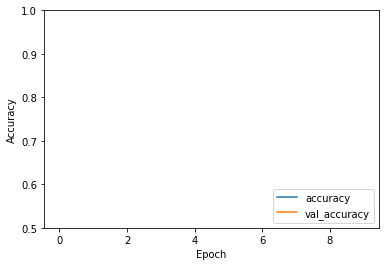

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
print(test_acc)

0.16677697002887726


In [23]:
from keract import get_activations, display_activations, display_heatmaps
keract_inputs = test_images[1:2]
# keract_targets = test_labels[:1]
activations = get_activations(model, keract_inputs)

conv2d_input (1, 256, 256, 3) 


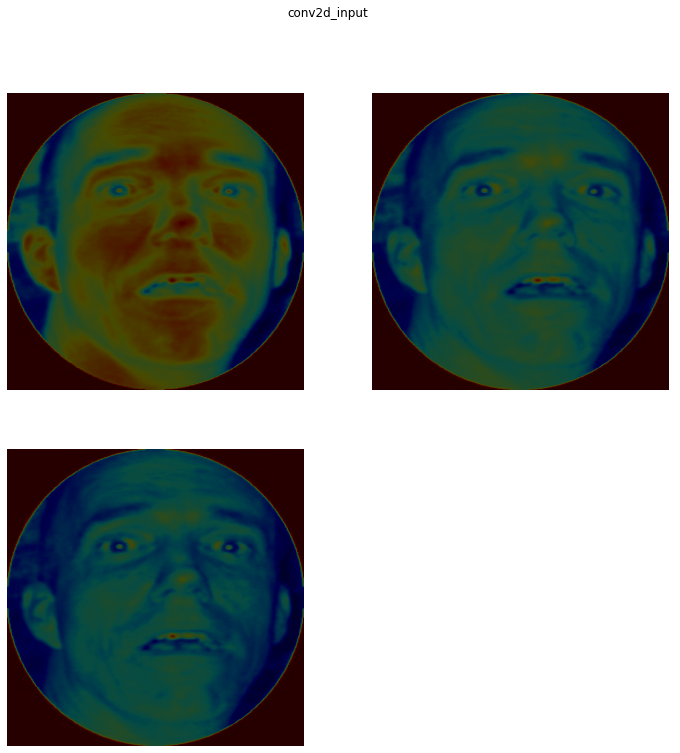

conv2d (1, 62, 62, 96) 


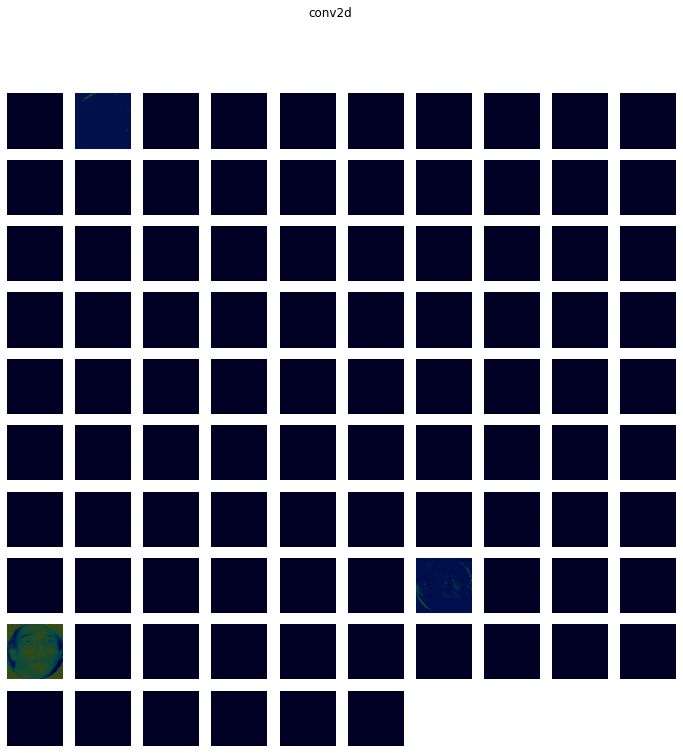

max_pooling2d (1, 30, 30, 96) 


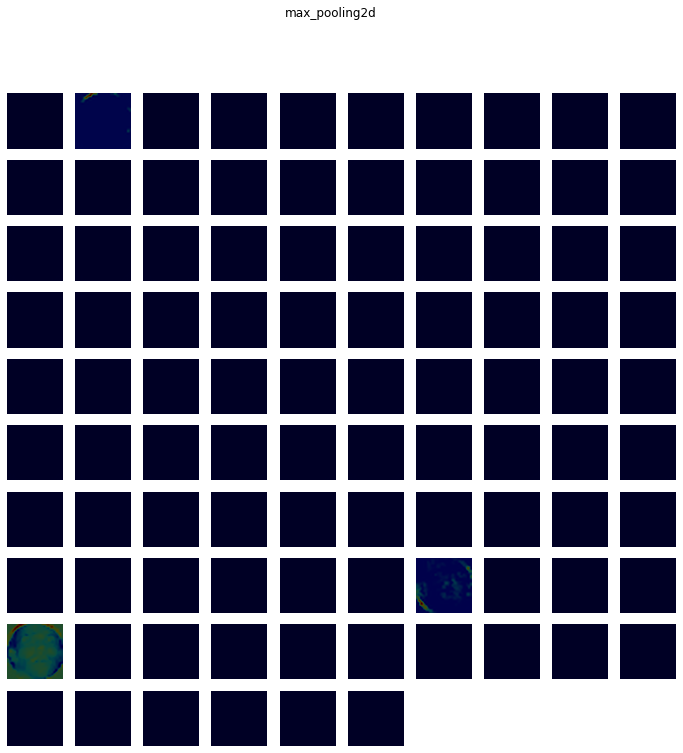

conv2d_1 (1, 30, 30, 256) 


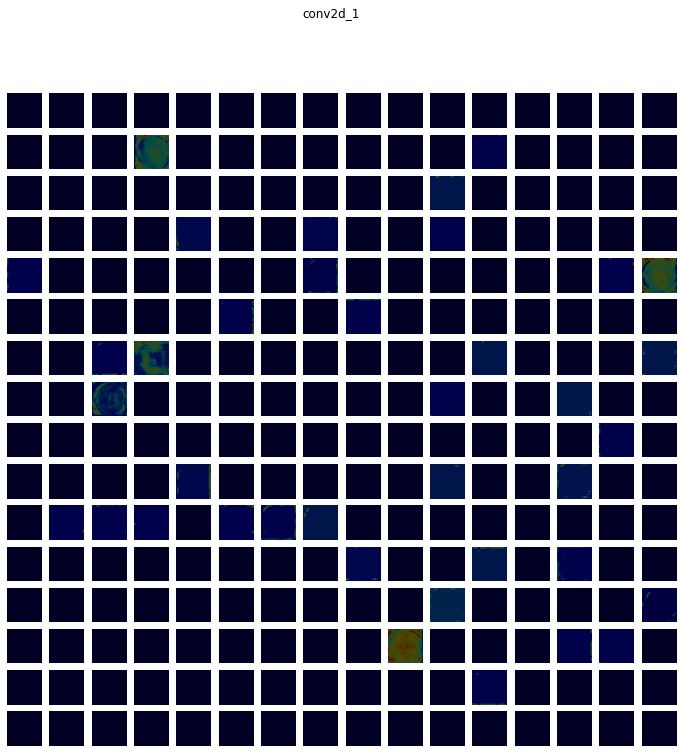

max_pooling2d_1 (1, 14, 14, 256) 


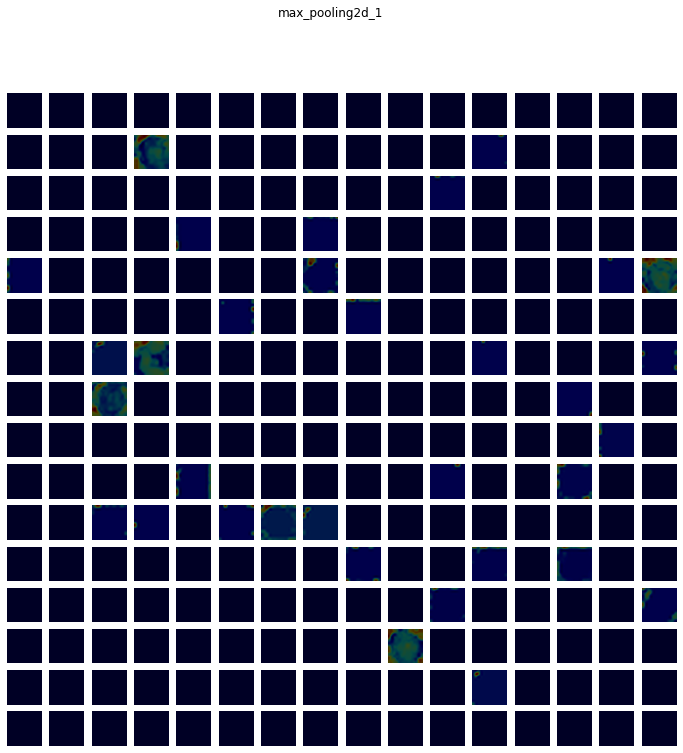

conv2d_2 (1, 14, 14, 384) 


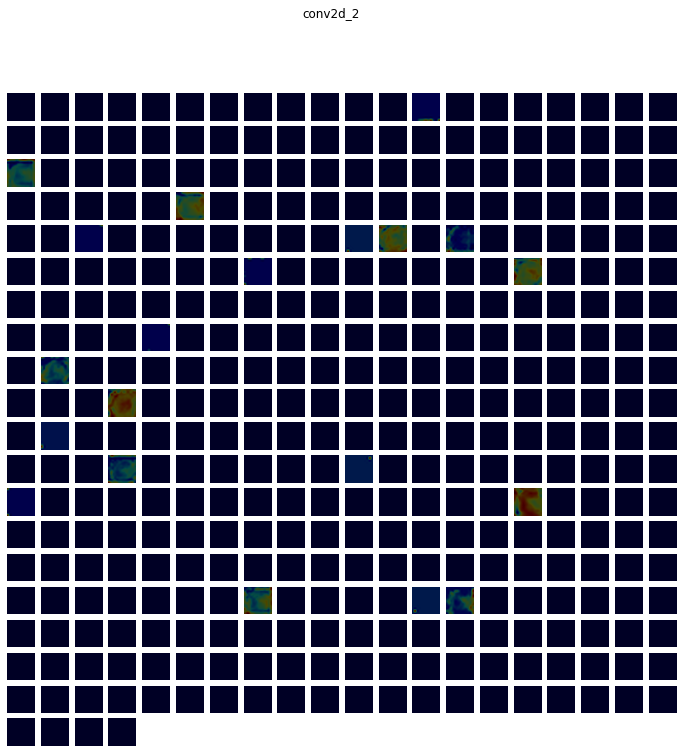

conv2d_3 (1, 14, 14, 384) 


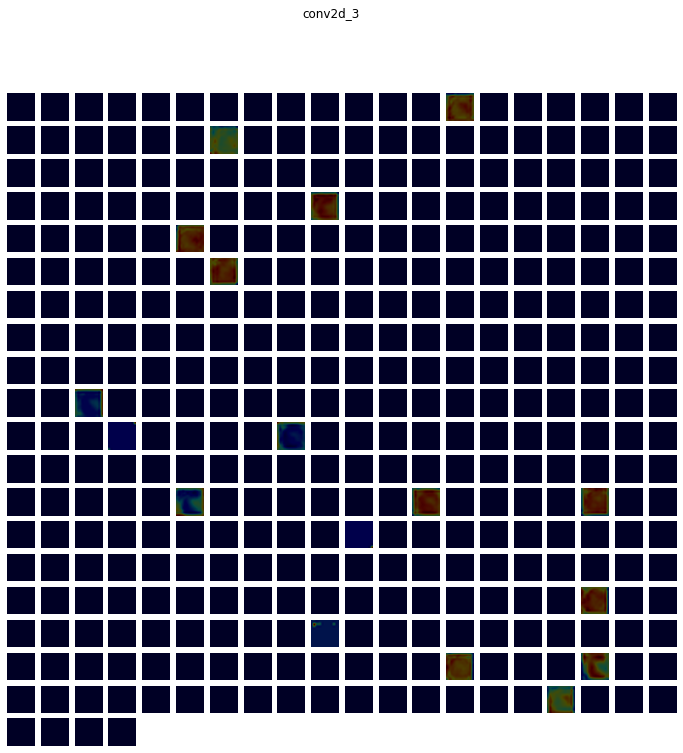

conv2d_4 (1, 14, 14, 256) 


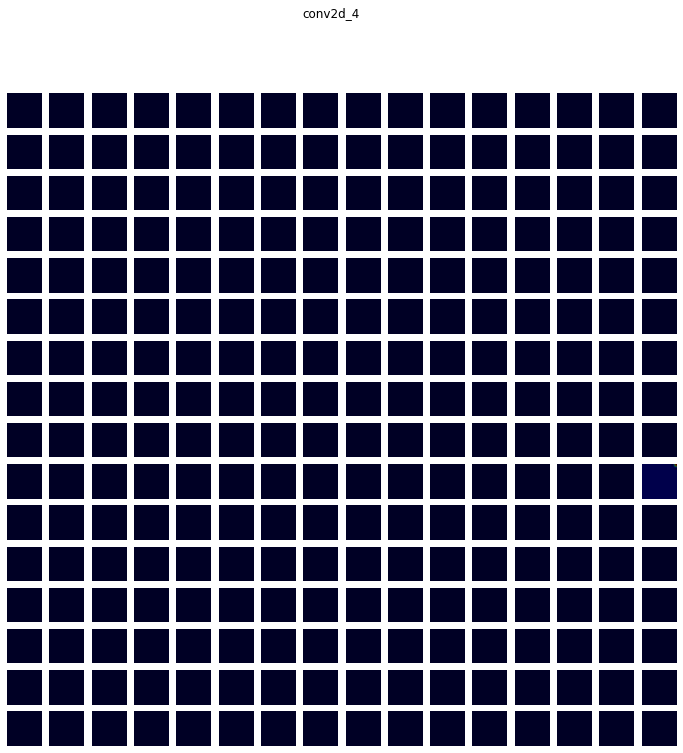

max_pooling2d_2 (1, 6, 6, 256) 


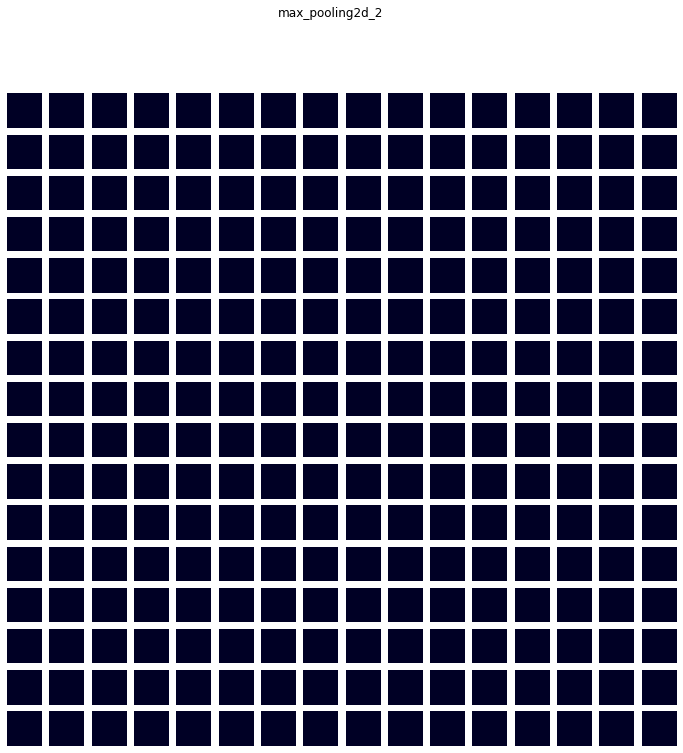

flatten (1, 9216) -> Skipped. 2D Activations.
dense (1, 4096) -> Skipped. 2D Activations.
dense_1 (1, 4096) -> Skipped. 2D Activations.
dense_2 (1, 7) -> Skipped. 2D Activations.


In [24]:
display_heatmaps(activations, keract_inputs, save=False)